# LGBM Final

In [19]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
%run ../modules.ipynb

In [21]:
init_data_paths("matan")

## Feature enrichment

In [22]:
print('loading data...')
train, test = load_data(DATA_PATH)

loading data...


In [23]:
train, test = basic_enrichment(train, test, helper_data_path=HELPER_DATA_PATH)
train, test = load_image_features(train, test, helper_data_path=HELPER_DATA_PATH)
train, test = load_text_features(train, test, helper_data_path=HELPER_DATA_PATH)
train, test = add_aggregated_features(train, test, helper_data_path=HELPER_DATA_PATH)
train, test = numeric_features_cleaning(train, test, helper_data_path=HELPER_DATA_PATH)
train, test = complete_image_top_1(train, test, helper_data_path=HELPER_DATA_PATH)
train, test = complete_price(train, test, helper_data_path=HELPER_DATA_PATH)

Adding basic features...
Done adding basic features.
Adding image features...


C:\Users\Matan\Google Drive\ds-workshop\Avito\utils\feature_enrichment.py:75: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Matan\Google Drive\ds-workshop\Avito\utils\feature_enrichment.py:76: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Done loading image features.
Loading text features...
loading tfidf features...
Done loading text features.
Loading aggregated features...
Done loading aggregated features.
Loading aggregated features...
Done loading aggregated features.
Cleaning and completing numeric features...


C:\Users\Matan\Google Drive\ds-workshop\Avito\utils\feature_enrichment.py:181: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Matan\Google Drive\ds-workshop\Avito\utils\feature_enrichment.py:182: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Done cleaning numeric features.
Completing image_top_1 features...
Done loading image_top_1 completions.
Completing price...
Done loading log_price_regression.


In [25]:
categorical_cols = ['user_type', 'user_id', \
                    'region', 'city', \
                    'parent_category_name', 'category_name', 'param_1', 'param_2', 'param_3', \
                    'image_top_1_class', 'image_top_1_rounded_regression', \
                    'month', 'day', 'weekday', \
                    'has_price', 'has_description', 'has_params', 'has_image'
                   ]
import gc
gc.collect()
for col in categorical_cols:
    print ("Encoding "+ str(col) + "...")
    train[col] = train[col].astype('category')
    test[col] = test[col].astype('category')
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(train[col].values.astype('str')) + list(test[col].values.astype('str')))
    train[col] = lbl.transform(list(train[col].values.astype('str')))
    test[col] = lbl.transform(list(test[col].values.astype('str')))

Encoding user_type...
Encoding user_id...
Encoding region...
Encoding city...
Encoding parent_category_name...
Encoding category_name...
Encoding param_1...
Encoding param_2...
Encoding param_3...
Encoding image_top_1_class...
Encoding image_top_1_rounded_regression...
Encoding month...
Encoding day...
Encoding weekday...
Encoding has_price...
Encoding has_description...
Encoding has_params...
Encoding has_image...


In [163]:
import string
count = lambda l1,l2: sum([1 for x in l1 if x in l2])
for col in ['description', 'title']:
    train['num_unique_words_' + col] = train[col].apply(lambda comment: len(set(w for w in comment.split())))
    test['num_unique_words_' + col] = test[col].apply(lambda comment: len(set(w for w in comment.split())))

train['num_desc_punct'] = train['description'].apply(lambda x: count(x, set(string.punctuation)))
test['num_desc_punct'] = test['description'].apply(lambda x: count(x, set(string.punctuation)))


In [164]:
categorical_cols = ['user_type', 'user_id', \
                    'region', 'city', \
                    'parent_category_name', 'category_name', 'param_1', 'param_2', 'param_3', \
                    'image_top_1_class', \
                    # 'image_top_1_rounded_regression'
                    #'month', 'day', 'weekday', \
                    #'has_price', 'has_description', 'has_params', 'has_image',
                   ]
numerical_cols = [ #'image_top_1_regression',
                  'log_price_regression','avg_days_up_user', 'avg_times_up_user', 'n_user_items', \
                      'item_seq_number',\
                    # 'param_1_count', 'param_2_count', 'param_3_count', 'item_seq_number_count',
                     #'log_item_seq_number', 'item_seq_number_count', \
                     'img_size', 'img_luminance', 'img_colorfulness', 'img_confidence', 'log_img_sharpness', 'log_img_keypoints', \
                     'title_word_count', 'description_word_count', 'merged_params_word_count', \
                     'num_desc_punct', 'num_unique_words_description', 'num_unique_words_title', \
                     'title_svd_1_ngram',
                     'title_svd_2_ngram',
                     'title_svd_3_ngram',
                     'title_svd_4_ngram',
                     'title_svd_5_ngram',
                     'title_svd_6_ngram',
                     'title_svd_7_ngram',
                     'title_svd_8_ngram',
                     'title_svd_9_ngram',
                     'title_svd_10_ngram',
                     'title_svd_11_ngram',
                     'title_svd_12_ngram',
                     'title_svd_13_ngram',
                     'title_svd_14_ngram',
                     'title_svd_15_ngram',
                     'title_svd_16_ngram',
                     'title_svd_17_ngram',
                     'title_svd_18_ngram',
                     'title_svd_19_ngram',
                     'title_svd_20_ngram',
                     'title_svd_21_ngram',
                     'title_svd_22_ngram',
                     'title_svd_23_ngram',
                     'title_svd_24_ngram',
                     'title_svd_25_ngram',
                     'title_svd_26_ngram',
                     'title_svd_27_ngram',
                     'title_svd_28_ngram',
                     'title_svd_29_ngram',
                     'title_svd_30_ngram',
                     'description_svd_1_ngram',
                     'description_svd_2_ngram',
                     'description_svd_3_ngram',
                     'description_svd_4_ngram',
                     'description_svd_5_ngram',
                     'description_svd_6_ngram',
                     'description_svd_7_ngram',
                     'description_svd_8_ngram',
                     'description_svd_9_ngram',
                     'description_svd_10_ngram',
                     'description_svd_11_ngram',
                     'description_svd_12_ngram',
                     'description_svd_13_ngram',
                     'description_svd_14_ngram',
                     'description_svd_15_ngram',
                     'description_svd_16_ngram',
                     'description_svd_17_ngram',
                     'description_svd_18_ngram',
                     'description_svd_19_ngram',
                     'description_svd_20_ngram',
                     'description_svd_21_ngram',
                     'description_svd_22_ngram',
                     'description_svd_23_ngram',
                     'description_svd_24_ngram',
                     'description_svd_25_ngram',
                     'description_svd_26_ngram',
                     'description_svd_27_ngram',
                     'description_svd_28_ngram',
                     'description_svd_29_ngram',
                     'description_svd_30_ngram', 
                     #'description_non_regular_chars_ratio', 'title_capital_letters_ratio','description_capital_letters_ratio', \
                     #'title_non_regular_chars_ratio', 'title_adj_to_len_ratio', 'title_noun_to_len_ratio',\
                     #'title_sentiment',
                 ]

feature_list = categorical_cols + numerical_cols + ['item_id']

def categorical_indices(df, categorical_cols):
    return [i for i, col in enumerate(df.columns) if col in categorical_cols]

#### Encoding Labels

In [165]:
# import gc
# gc.collect()
# for col in categorical_cols:
#     print ("Encoding "+ str(col) + "...")
#     train[col] = train[col].astype('category')
#     test[col] = test[col].astype('category')
#     lbl = preprocessing.LabelEncoder()
#     lbl.fit(list(train[col].values.astype('str')) + list(test[col].values.astype('str')))
#     train[col] = lbl.transform(list(train[col].values.astype('str')))
#     test[col] = lbl.transform(list(test[col].values.astype('str')))

In [166]:
list(train.columns)

['item_id',
 'user_id',
 'region',
 'city',
 'parent_category_name',
 'category_name',
 'param_1',
 'param_2',
 'param_3',
 'title',
 'description',
 'price',
 'item_seq_number',
 'activation_date',
 'user_type',
 'image',
 'image_top_1',
 'deal_probability',
 'has_description',
 'has_price',
 'has_params',
 'has_image',
 'month',
 'day',
 'weekday',
 'user_ads_count',
 'item_seq_number_count',
 'param_1_count',
 'param_2_count',
 'param_3_count',
 'title_description_params',
 'img_size',
 'img_sharpness',
 'img_luminance',
 'img_colorfulness',
 'img_confidence',
 'img_keypoints',
 'log_img_sharpness',
 'log_img_keypoints',
 'title_word_count',
 'description_non_regular_chars_ratio',
 'description_word_count',
 'merged_params_word_count',
 'description_sentence_count',
 'description_words/sentence_ratio',
 'title_capital_letters_ratio',
 'description_capital_letters_ratio',
 'title_non_regular_chars_ratio',
 'title_num_of_newrow_char',
 'description_num_of_newrow_char',
 'title_num_adj

#### Splitting data

In [167]:
X_df = train[feature_list].fillna(0)
y_df = train['deal_probability'].values

In [168]:
X_test_df = test[feature_list].fillna(0)
X_train_df, X_val_df, y_train_df, y_val_df = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

In [169]:
X_train_item_id = X_train_df[['item_id']]
X_test_item_id = X_test_df[['item_id']]
X_val_item_id = X_val_df[['item_id']]
del X_train_df['item_id']
del X_test_df['item_id']
del X_val_df['item_id']

# LightGBM

* https://github.com/Microsoft/LightGBM/tree/master/examples/python-guide
* https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc

We try both regression and poisson objectives in the ensemble model, so we train both.

In [170]:
objective = 'regression'

In [171]:
categorical_features_idx = categorical_indices(X_df, categorical_cols)
lgb_train = lgb.Dataset(X_train_df, label=y_train_df)
lgb_val = lgb.Dataset(X_val_df, y_val_df, reference=lgb_train)

params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': objective,
    'metric': 'rmse',
    'max_depth': 15,
    'num_leaves': 512,
    'num_estimators':38,
    'feature_fraction': 0.6,
    'learning_rate': 0.02,
    'ransom_state':[501],
    'verbose': 1
}

def train_lgb(my_params, my_lgb_train, my_lgb_val):
    evals_result = {}
    clf = lgb.train(my_params, 
                    my_lgb_train, 
                    num_boost_round=2000,
                    valid_sets=[my_lgb_train, my_lgb_val],
                    early_stopping_rounds=200,
                    feature_name=feature_list[:-1],
                    categorical_feature=categorical_features_idx,
                    evals_result=evals_result,
                    verbose_eval=200)
    return clf, evals_result

clf, evals_result = train_lgb(params, lgb_train, lgb_val)

C:\Users\Matan\Anaconda3\lib\site-packages\lightgbm\basic.py:1038: UserWarning:

categorical_feature in Dataset is overridden. New categorical_feature is [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

C:\Users\Matan\Anaconda3\lib\site-packages\lightgbm\basic.py:681: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 200 rounds.
[200]	training's rmse: 0.210552	valid_1's rmse: 0.221633
[400]	training's rmse: 0.201022	valid_1's rmse: 0.219977
[600]	training's rmse: 0.19456	valid_1's rmse: 0.219448
[800]	training's rmse: 0.189355	valid_1's rmse: 0.219139
[1000]	training's rmse: 0.184821	valid_1's rmse: 0.219
[1200]	training's rmse: 0.180672	valid_1's rmse: 0.218899
[1400]	training's rmse: 0.176901	valid_1's rmse: 0.218851
[1600]	training's rmse: 0.173311	valid_1's rmse: 0.218801
[1800]	training's rmse: 0.169882	valid_1's rmse: 0.218775
[2000]	training's rmse: 0.166695	valid_1's rmse: 0.21878
Did not meet early stopping. Best iteration is:
[2000]	training's rmse: 0.166695	valid_1's rmse: 0.21878


In [172]:
def test_lgb(clf, X_test, y_test):
    y_pred = clf.predict(X_test, num_iteration= clf.best_iteration)
    y_pred = np.clip(y_pred, 0, 1)
    res = rmse(y_pred, y_test)
    print(res)
    return res
gc.collect()
results = {}
results['lgbm'] = { 'rmse': test_lgb(clf, X_val_df, y_val_df) }

0.2187106322867563


### Analyzing results

Plot metrics during training...


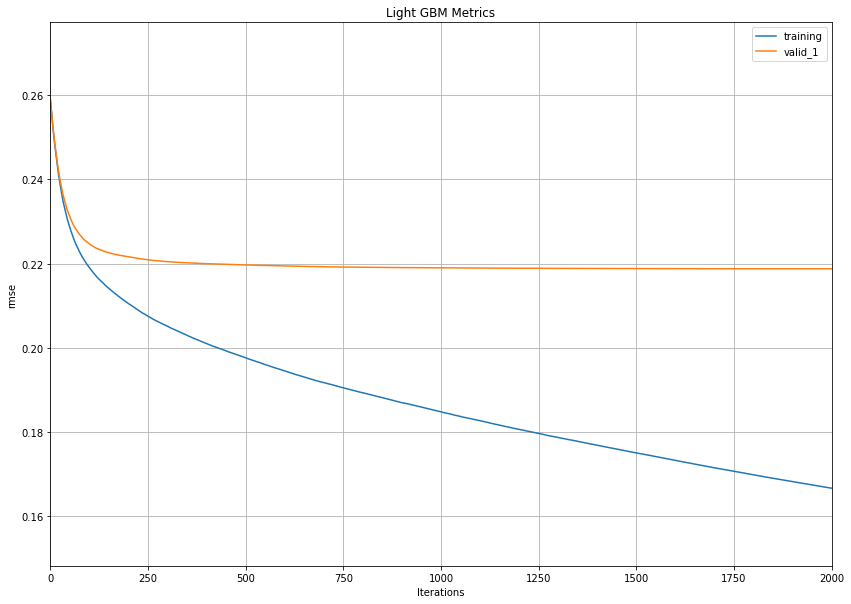

Plot feature importances...


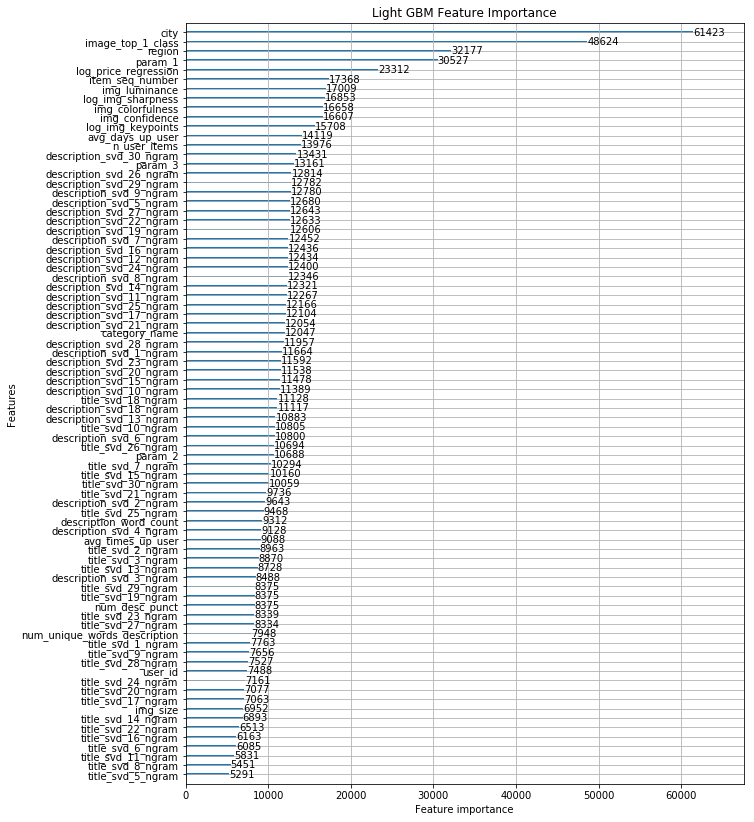

In [173]:
def analyze_lgbm_result():
    print('Plot metrics during training...')
    ax = lgb.plot_metric(evals_result, metric='rmse')
    plt.title("Light GBM Metrics")
    plt.show()

    print('Plot feature importances...')
    fig, ax = plt.subplots(figsize=(10, 14))
    lgb.plot_importance(clf, max_num_features=80, ax=ax)
    plt.title("Light GBM Feature Importance")
    plt.show()

#     print('Plot 84th tree...')  # one tree use categorical feature to split
#     ax = lgb.plot_tree(clf, tree_index=83, figsize=(20, 8), show_info=['split_gain'])
#     plt.show()

#     print('Plot 84th tree with graphviz...')
# #     graph = lgb.create_tree_digraph(clf, tree_index=83, name='Tree84')
# #     graph.render(view=True)
    
analyze_lgbm_result()

### 10-Fold Cross Validation

Pretty useless since the kaggle results give us the best "cross-validation" results

In [174]:
# categorical_features_idx = categorical_indices(X_df, categorical_cols)

# lgb_train = lgb.Dataset(X_df, label=y_df)

# params = {
#     'task': 'train',
#     'boosting_type': 'gbdt',
#     'objective': 'regression',
#     'metric': 'rmse',
#     'max_depth': 15,
#     'num_leaves': 32,
#     'feature_fraction': 0.6,
# #     'bagging_fraction': 0.75,
# #     'bagging_freq': 2,
#     'learning_rate': 0.05,
#     'verbose': 1
# }


# def train_cv(my_params, my_lgb_train):
#     print("Starting cross validation")
#     lgb.cv(my_params, 
#             my_lgb_train,
#             stratified = False,
#             nfold=10,
#             init_model=clf,
#             num_boost_round=200,
#             feature_name=feature_list,
#             categorical_feature=categorical_features_idx,
#             verbose_eval=50)

# train_cv(params, lgb_train)

### Get Submission Result

In [175]:
y_pred = clf.predict(X_test_df)
y_pred = np.clip(y_pred, 0, 1)

In [176]:
res_df = pd.DataFrame(test['item_id'])
res_df['deal_probability'] = y_pred

In [177]:
res_df.to_csv('../submissions/submit_res_lgbm_%s_10.csv.gz' % objective, index=None, compression='gzip')

### Get predictions on all data to unify with an ensemble model

In [80]:
y_train_pred = clf.predict(X_train_df)
res_train_df = pd.DataFrame(X_train_item_id['item_id'])
res_train_df['deal_probability'] = y_train_pred

In [81]:
y_val_pred = clf.predict(X_val_df)
res_val_df = pd.DataFrame(X_val_item_id['item_id'])
res_val_df['deal_probability'] = y_val_pred

In [82]:
y_test_pred = clf.predict(X_test_df)
res_test_df = pd.DataFrame(X_test_item_id['item_id'])
res_test_df['deal_probability'] = y_test_pred

In [83]:
res = pd.concat([res_train_df, res_val_df, res_test_df], axis=0)

In [84]:
res.to_csv('../all_data_lgbm_%s_results_0.2295.csv.gz' % objective, index=None, compression='gzip')

In [ ]:
gc.collect()

## Prediction Analysis

In [ ]:
y_pred = clf.predict(X_val_df)

In [ ]:
y_pred = np.clip(y_pred, 0, 1)
X_val_df['pred_dp'] = y_pred
X_val_df['real_dp'] = y_val_df
X_val_df['mistake'] = np.abs(y_val_df - y_pred)
bad_df = X_val_df.sort_values(by='mistake', ascending=False).iloc[:25000]
good_df = X_val_df.sort_values(by='mistake', ascending=True).iloc[:25000]

We might wish to predict high price and low price seperately

In [ ]:
user_type_dist = good_df.groupby('user_type').size()
explode = (0.15, 0, 0)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
labels = user_type_dist.index
fig1, ax1 = plt.subplots()
ax1.pie(user_type_dist, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.title('User types by percentage Good')
plt.show()

In [ ]:
user_type_dist = bad_df.groupby('user_type').size()
explode = (0.15, 0, 0)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
labels = user_type_dist.index
fig1, ax1 = plt.subplots()
ax1.pie(user_type_dist, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.title('User types by percentage Bad')
plt.show()

In [ ]:
user_type_dist = X_df.groupby('user_type').size()
explode = (0.15, 0, 0)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
labels = user_type_dist.index
fig1, ax1 = plt.subplots()
ax1.pie(user_type_dist, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.title('User types by percentage')
plt.show()

We can see that we have higher success rate on the smaller classes of user types

In [ ]:
category_counts = good_df.groupby('category_name').size().sort_values(ascending=False)
plt.xticks(rotation=90)
plt.bar(category_counts.index, category_counts.values)
plt.title('Number of items per category Good')
plt.show()
category_counts = good_df.groupby('parent_category_name').size().sort_values(ascending=False)
plt.xticks(rotation=90)
plt.bar(category_counts.index, category_counts.values)
plt.title('Number of items per parent category Good')
plt.show()

parent_category_dist = good_df.groupby('parent_category_name').size()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
labels = parent_category_dist.index
fig1, ax1 = plt.subplots()
ax1.pie(parent_category_dist, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.title('Parent categories by percentage Good')
plt.show()

In [ ]:
category_counts = bad_df.groupby('category_name').size().sort_values(ascending=False)
plt.xticks(rotation=90)
plt.bar(category_counts.index, category_counts.values)
plt.title('Number of items per category Bad')
plt.show()
category_counts = bad_df.groupby('parent_category_name').size().sort_values(ascending=False)
plt.xticks(rotation=90)
plt.bar(category_counts.index, category_counts.values)
plt.title('Number of items per parent category Bad')
plt.show()

parent_category_dist = bad_df.groupby('parent_category_name').size()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
labels = parent_category_dist.index
fig1, ax1 = plt.subplots()
ax1.pie(parent_category_dist, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.title('Parent categories by percentage Bad')
plt.show()

In [ ]:
category_counts = X_df.groupby('category_name').size().sort_values(ascending=False)
plt.xticks(rotation=90)
plt.bar(category_counts.index, category_counts.values)
plt.title('Number of items per category')
plt.show()
category_counts = X_df.groupby('parent_category_name').size().sort_values(ascending=False)
plt.xticks(rotation=90)
plt.bar(category_counts.index, category_counts.values)
plt.title('Number of items per parent category')
plt.show()

parent_category_dist = X_df.groupby('parent_category_name').size()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
labels = parent_category_dist.index
fig1, ax1 = plt.subplots()
ax1.pie(parent_category_dist, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.title('Parent categories by percentage')
plt.show()

We don't predict well categories 0,2

In [ ]:
region_counts = good_df.groupby('region').size().sort_values(ascending=False)
plt.xticks(rotation=90)
plt.bar(region_counts.index, region_counts.values)
plt.title('Number of items per region Good')
plt.show()
city_counts = good_df.groupby('city').size().sort_values(ascending=False)
plt.xticks(rotation=90)
plt.bar(city_counts.index, city_counts.values)
plt.title('Number of items per city Good')
plt.show()

In [ ]:
region_counts = bad_df.groupby('region').size().sort_values(ascending=False)
plt.xticks(rotation=90)
plt.bar(region_counts.index, region_counts.values)
plt.title('Number of items per region Bad')
plt.show()
city_counts = bad_df.groupby('city').size().sort_values(ascending=False)
plt.xticks(rotation=90)
plt.bar(city_counts.index, city_counts.values)
plt.title('Number of items per city Bad')
plt.show()

In [ ]:
region_counts = X_df.groupby('region').size().sort_values(ascending=False)
plt.xticks(rotation=90)
plt.bar(region_counts.index, region_counts.values)
plt.title('Number of items per region')
plt.show()
city_counts = X_df.groupby('city').size().sort_values(ascending=False)
plt.xticks(rotation=90)
plt.bar(city_counts.index, city_counts.values)
plt.title('Number of items per city')
plt.show()

In [ ]:
weekday_counts = good_df.groupby('day').size().sort_values(ascending=False)
plt.xticks(rotation=45)
plt.bar(weekday_counts.index, weekday_counts.values)
plt.title('Number of items per weekday Good')
plt.show()

In [ ]:
weekday_counts = bad_df.groupby('day').size().sort_values(ascending=False)
plt.xticks(rotation=45)
plt.bar(weekday_counts.index, weekday_counts.values)
plt.title('Number of items per weekday Bad')
plt.show()

In [ ]:
weekday_counts = X_df.groupby('day').size().sort_values(ascending=False)
plt.xticks(rotation=45)
plt.bar(weekday_counts.index, weekday_counts.values)
plt.title('Number of items per weekday')
plt.show()